# Seattle Airbnb Data - How to get best rate for your seattle getaway

## Project
This project will use the open-source Airbnb data which describes the Seattle, WA homestays listing activity. This project will be used as a part of the "Become a data scientist Nanodegree"  program of Udacity. 

While wrangling, modelling and visualizing the data, we will answer the following questions:

      What are the busiest times of the year to visit Seattle? By how much do prices spike?
      what factors affect listing prices?
      time of the year with lowest rates?
      Neighbourhoods with lowest rates.

## The data

The dataset used is part of Airbnb Inside data, and the original source can be found [here](http://insideairbnb.com/get-the-data/).

Some of the activity included in the dataset include:
    Listings, including full descriptions and average review score
    Reviews, including unique id for each reviewer and detailed comments
    Calendar, including listing id and the price and availability for that day


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime 
%matplotlib inline

## Exploratory Data Analysis

In [2]:
# Read in homestay data
calendar = pd.read_csv('calendar.csv') 
print(calendar.head())
print('columns : {}  Rows : {}'.format(calendar.shape[1],calendar.shape[0]))

# Data range from 2016-01-04 till 2017-01-02 (abt one year)

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
columns : 4  Rows : 1393570


In [3]:
# Set datetime datatype 
calendar['date'] = pd.to_datetime(calendar['date'],format='%Y-%m-%d')

#remove $ sign from price column/ convert to int type
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce')

#Encode Available from t & f to 1 & 0
calendar['available'].replace({'f': 0, 't': 1}, inplace=True)
calendar['available'] = pd.to_numeric(calendar['available'], errors='coerce')
calendar.head()

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/2873703106.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '')


,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [4]:
# Lets find the busiest time of the year , when listings aremostly unavailable
calendar['month'] = calendar['date'].dt.month
calendar['day'] = calendar['date'].dt.day

grp_price =calendar.groupby(['month', 'day'],as_index=False).mean()
grp_price.head(3)

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/2530031337.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_price =calendar.groupby(['month', 'day'],as_index=False).mean()


,month,day,listing_id,available,price
0,1,1,5.550111e+06,0.765322,137.536644
1,1,2,5.550111e+06,0.727082,134.949531
2,1,4,5.550111e+06,0.454426,122.085879


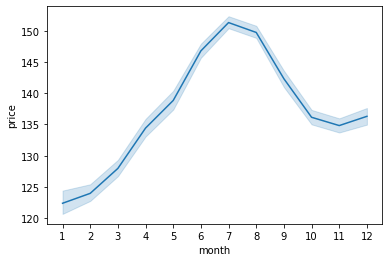

In [5]:
# Most expensive time of the year
sns.lineplot(x = "month", y = "price", data=grp_price)
plt.xticks(range(1,13,1))
plt.show()

In [6]:
# Most expensive/ least expensive price of the year on average

print('Most expensive Time to Visit Seattle ')
print(grp_price[grp_price['price'] == grp_price['price'].max()])

print('\n')

print('Least expensive Time to Visit Seattle')
print(grp_price[grp_price['price'] == grp_price['price'].min()])


Most expensive Time to Visit Seattle 
     month  day    listing_id  available       price
181      7    1  5.550111e+06   0.615506  156.677598


Least expensive Time to Visit Seattle
    month  day    listing_id  available       price
26      1   28  5.550111e+06   0.596124  117.297582


In [7]:
# By how much does price increase during peak price periods
print('Average AirBnb price all year round is {} dollars'.format(round(grp_price['price'].mean(),2)))

# % Increase
rel_increase = (grp_price['price'].max() - grp_price['price'].mean())/ grp_price['price'].mean()
perc_increase = round(rel_increase * 100,2)

print('During peak pricing period, prices increase by about {}%'.format(perc_increase))

Average AirBnb price all year round is 137.16 dollars
During peak pricing period, prices increase by about 14.23%


In [8]:
# Read in listings data
listings =pd.read_csv('listings.csv')
listings.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [9]:
# Prepare listing data - price columns
# Remove dollar symbols
price_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit']
for cols in price_cols:
    listings[cols] = listings[cols].str.replace('$', '')

# convert to numeric
listings[price_cols] = listings[price_cols].apply(pd.to_numeric, errors='coerce')

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/804334385.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings[cols] = listings[cols].str.replace('$', '')


In [10]:
# Most important factors affecting prices
listings.corr()['price'].sort_values(ascending = False)

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/3179658900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings.corr()['price'].sort_values(ascending = False)


price                             1.000000
weekly_price                      0.855866
accommodates                      0.659512
bedrooms                          0.633585
beds                              0.596287
square_feet                       0.531752
bathrooms                         0.524012
guests_included                   0.399100
monthly_price                     0.358269
security_deposit                  0.341985
host_listings_count               0.095686
host_total_listings_count         0.095686
review_scores_location            0.084261
review_scores_rating              0.053832
review_scores_cleanliness         0.053454
minimum_nights                    0.017728
review_scores_accuracy            0.017693
review_scores_communication       0.012145
review_scores_checkin             0.006881
maximum_nights                   -0.003902
latitude                         -0.012257
availability_365                 -0.018035
availability_30                  -0.039432
review_scor

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/3232295818.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_neighbourhood = listings.groupby('neighbourhood_cleansed',as_index=False).mean()


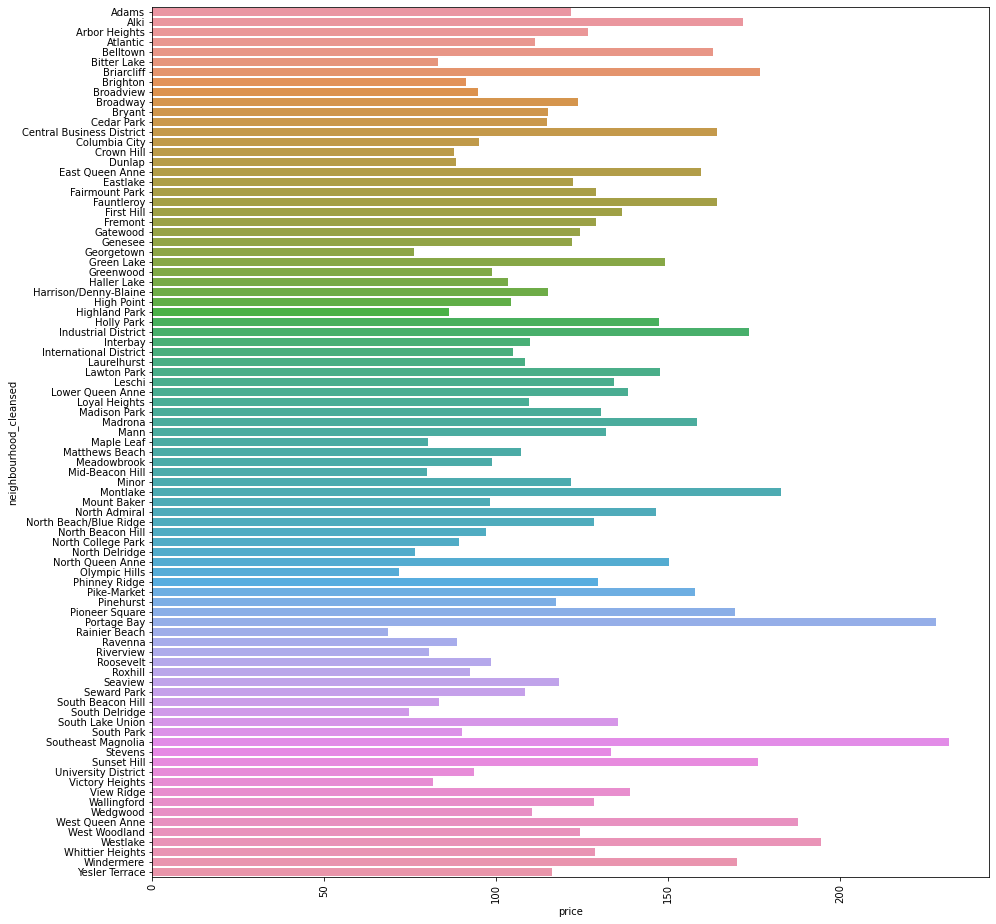

In [11]:
# neighbourhood Analysis
grp_neighbourhood = listings.groupby('neighbourhood_cleansed',as_index=False).mean()
plt.figure(figsize=(15,16))
sns.barplot(y = "neighbourhood_cleansed", x = "price", data=grp_neighbourhood, orient='h')
#plt.xticks(range(1,13,1))
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Cheapest Neighbourhoods
grp_neighbourhood[['neighbourhood_cleansed','price']].sort_values('price')[:10]

,neighbourhood_cleansed,price
62,Rainier Beach,68.555556
56,Olympic Hills,71.687500
70,South Delridge,74.666667
24,Georgetown,76.125000
54,North Delridge,76.375000
46,Mid-Beacon Hill,79.933333
43,Maple Leaf,80.261905
64,Riverview,80.500000
77,Victory Heights,81.466667
5,Bitter Lake,83.000000


In [13]:
# most expensive neighbourhoods
grp_neighbourhood[['neighbourhood_cleansed','price']].sort_values('price', ascending=False)[:10]

,neighbourhood_cleansed,price
73,Southeast Magnolia,231.705882
61,Portage Bay,227.857143
83,Westlake,194.470588
81,West Queen Anne,187.769231
48,Montlake,182.789474
6,Briarcliff,176.571429
75,Sunset Hill,176.055556
32,Industrial District,173.333333
1,Alki,171.619048
85,Windermere,169.900000


## Modelling: Feature - engineering

C:\Users\rasim\AppData\Local\Temp/ipykernel_2132/4290889323.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings.corr())


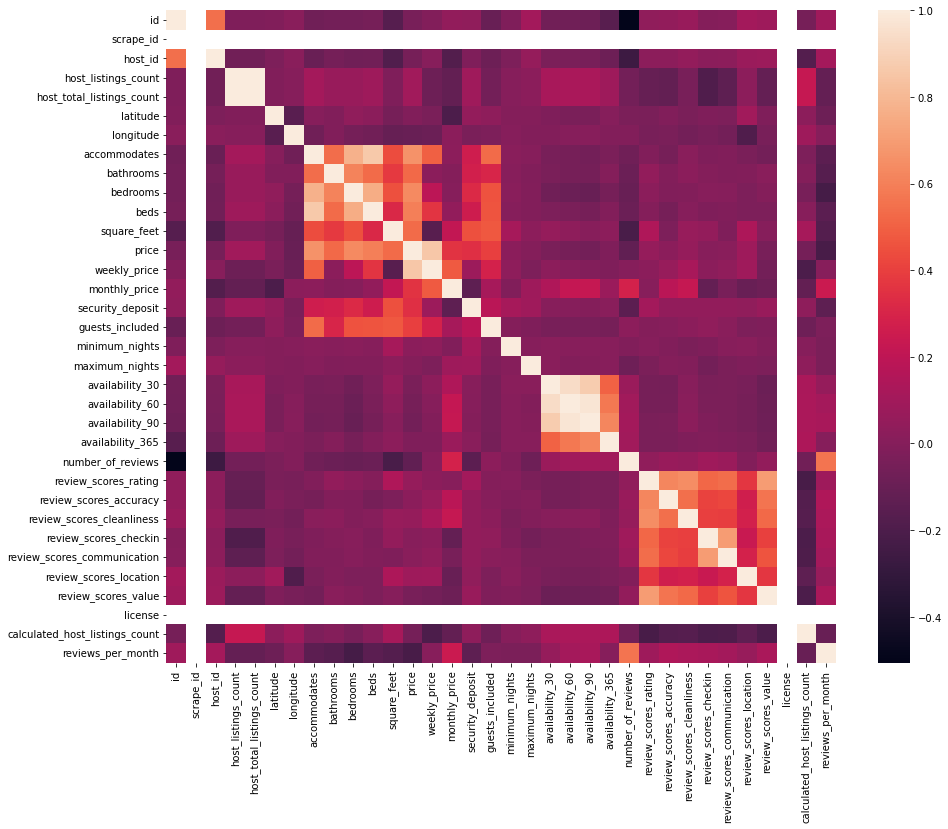

In [14]:
# Remove features that are not well correlated to price, other price features like 'weekly_price', monthly_price will be removed to prevent data leakage
plt.figure(figsize = (15,12))
sns.heatmap(listings.corr())
plt.show()

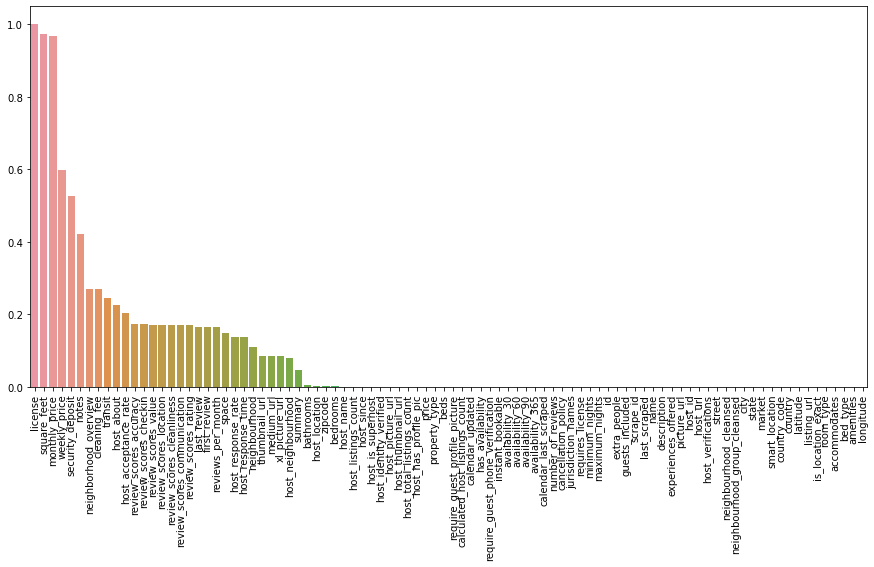

In [15]:
# Columns with a high percentage of missing values shall be dropped as well e.g square_feet 97% na
avg_na = listings.isna().mean().sort_values(ascending=False)
plt.figure(figsize=(15,7))
sns.barplot(x= avg_na.index, y=avg_na.values, orient='v')
plt.xticks(rotation = 90)
plt.show()

In [16]:
#Using correlations above we will choose importatnt variables for maodellig
# Features with correlation less than 0.1 are dropped
# To prevent data leakage other price columns will be removed as ['price', 'weekly_price', 'monthly_price']
# Features with high missing values are dropped 

num_vars = ['accommodates', 'bedrooms', 'beds',
       'bathrooms', 'guests_included','id',
       'calculated_host_listings_count',
       'number_of_reviews', 'reviews_per_month']

# Non Numeric features
cat_vars = ['neighbourhood_cleansed', 'host_verifications', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']

listings = listings.dropna(subset=['price'], axis=0)
target = listings['price']
features = pd.concat([listings[num_vars], listings[cat_vars]], axis=1)

#date_vars = 'host_since' 

#special_vars = ['cleaning_fee', 'extra_people']

In [17]:
# Fill in missing values
for cols in num_vars:
       features[cols].fillna((features[cols].mean()), inplace = True) 

# Fill in missing values
for cols in cat_vars:
       features[cols].fillna((features[cols].mode()), inplace = True) 
       features = pd.concat([features.drop(cols, axis=1), pd.get_dummies(features[cols], prefix=cols, prefix_sep='_', drop_first=True)], axis=1)
       
       

In [18]:
X = features
Y = target

### Modelling

In [19]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [42]:
# Fit Linear model

from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

lm_preds = lm.predict(X_test)
mse = mean_squared_error(y_test, lm_preds)
mae = mean_absolute_error(y_test, lm_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lm_preds)

print('MSE : {} \n RMSE : {} \n MAE : {} \n r2 : {}'.format(mse,rmse,mae, r2))


MSE : 3586.672907046625 
 RMSE : 59.8888379169827 
 MAE : 38.30251902496026 
 r2 : 0.5386323349534459


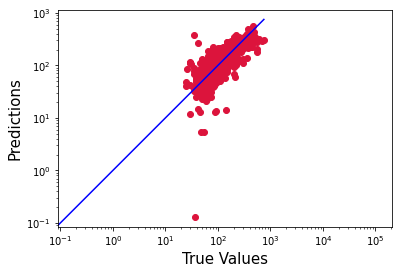

In [43]:
# Plot predicted vs Actual
plt.scatter(y_test, lm_preds, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(lm_preds), max(y_test))
p2 = min(min(lm_preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [23]:
# Random Forest regressor model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
mse = mean_squared_error(y_test, rf_preds)
mae = mean_absolute_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)
rmse = np.sqrt(mse)

print('MSE : {} \n RMSE : {} \n MAE : {} \n r2 : {}'.format(mse,rmse,mae, r2))


MSE : 2996.3769772251303 
 RMSE : 54.73917223730306 
 MAE : 32.79688481675392 
 r2 : 0.6145643928484279


<BarContainer object of 20 artists>

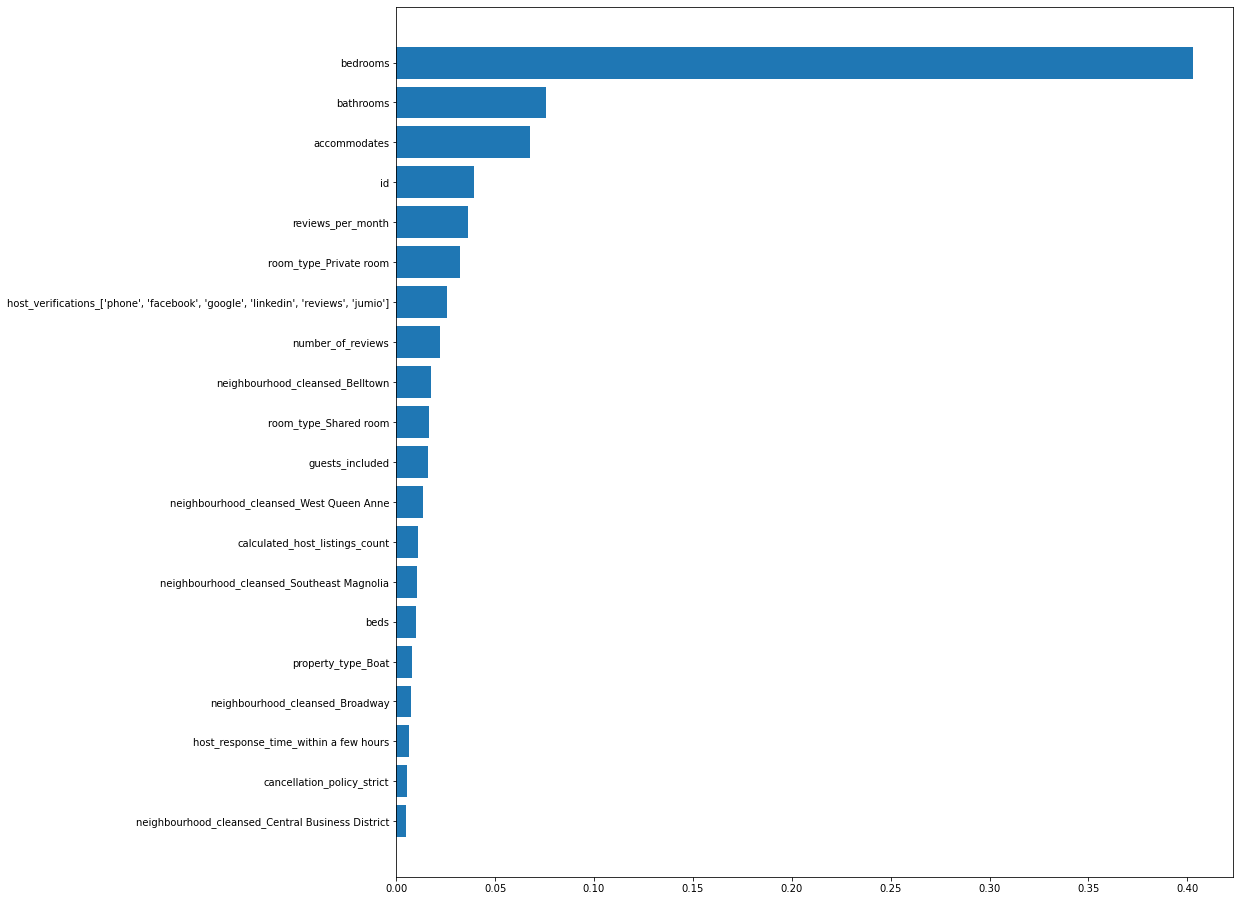

In [40]:
plt.figure(figsize=(15,16))
sorted_idx =rf_model.feature_importances_.argsort()


plt.barh(X_train.columns[sorted_idx][-20:], rf_model.feature_importances_[sorted_idx][-20:])

## Conclusion

The best time to Visit Seattle if Airbnb rates are sole indicators will be in January when prices are lowest. Totally avoid the period around July as it is the most expensive time as ascertained from the data. A way of keeper accomodation cost even lower is by choosing to rent an Airbnb in the cheaper neighbourhood such as Rainier Beach, Olympic Hills, South Delridge, 
Georgetown and other similarly priced areas as indicated in this analysis. Type of apartment could also influence cost, hence opt instead to stay in a smaller apartment with less bedrooms. 